In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
battery = pd.read_csv("Battery_RUL.csv")
battery.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [3]:
corr = battery.corr(method = 'pearson')
corr

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
Cycle_Index,1.000000,-0.011925,-0.012090,-0.782859,0.759850,-0.176486,-0.040622,-0.018305,-0.999756
Discharge Time (s),-0.011925,1.000000,0.444984,0.349161,-0.239410,0.776720,0.912536,0.935544,0.011957
Decrement 3.6-3.4V (s),-0.012090,0.444984,1.000000,0.199470,-0.132765,0.477091,0.343228,0.371610,0.011998
Max. Voltage Dischar. (V),-0.782859,0.349161,0.199470,1.000000,-0.718182,0.446070,0.286886,0.269009,0.782800
Min. Voltage Charg. (V),0.759850,-0.239410,-0.132765,-0.718182,1.000000,-0.344098,-0.216840,-0.200423,-0.759805
Time at 4.15V (s),-0.176486,0.776720,0.477091,0.446070,-0.344098,1.000000,0.568922,0.676859,0.176514
Time constant current (s),-0.040622,0.912536,0.343228,0.286886,-0.216840,0.568922,1.000000,0.953522,0.040675
Charging time (s),-0.018305,0.935544,0.371610,0.269009,-0.200423,0.676859,0.953522,1.000000,0.018299
RUL,-0.999756,0.011957,0.011998,0.782800,-0.759805,0.176514,0.040675,0.018299,1.000000


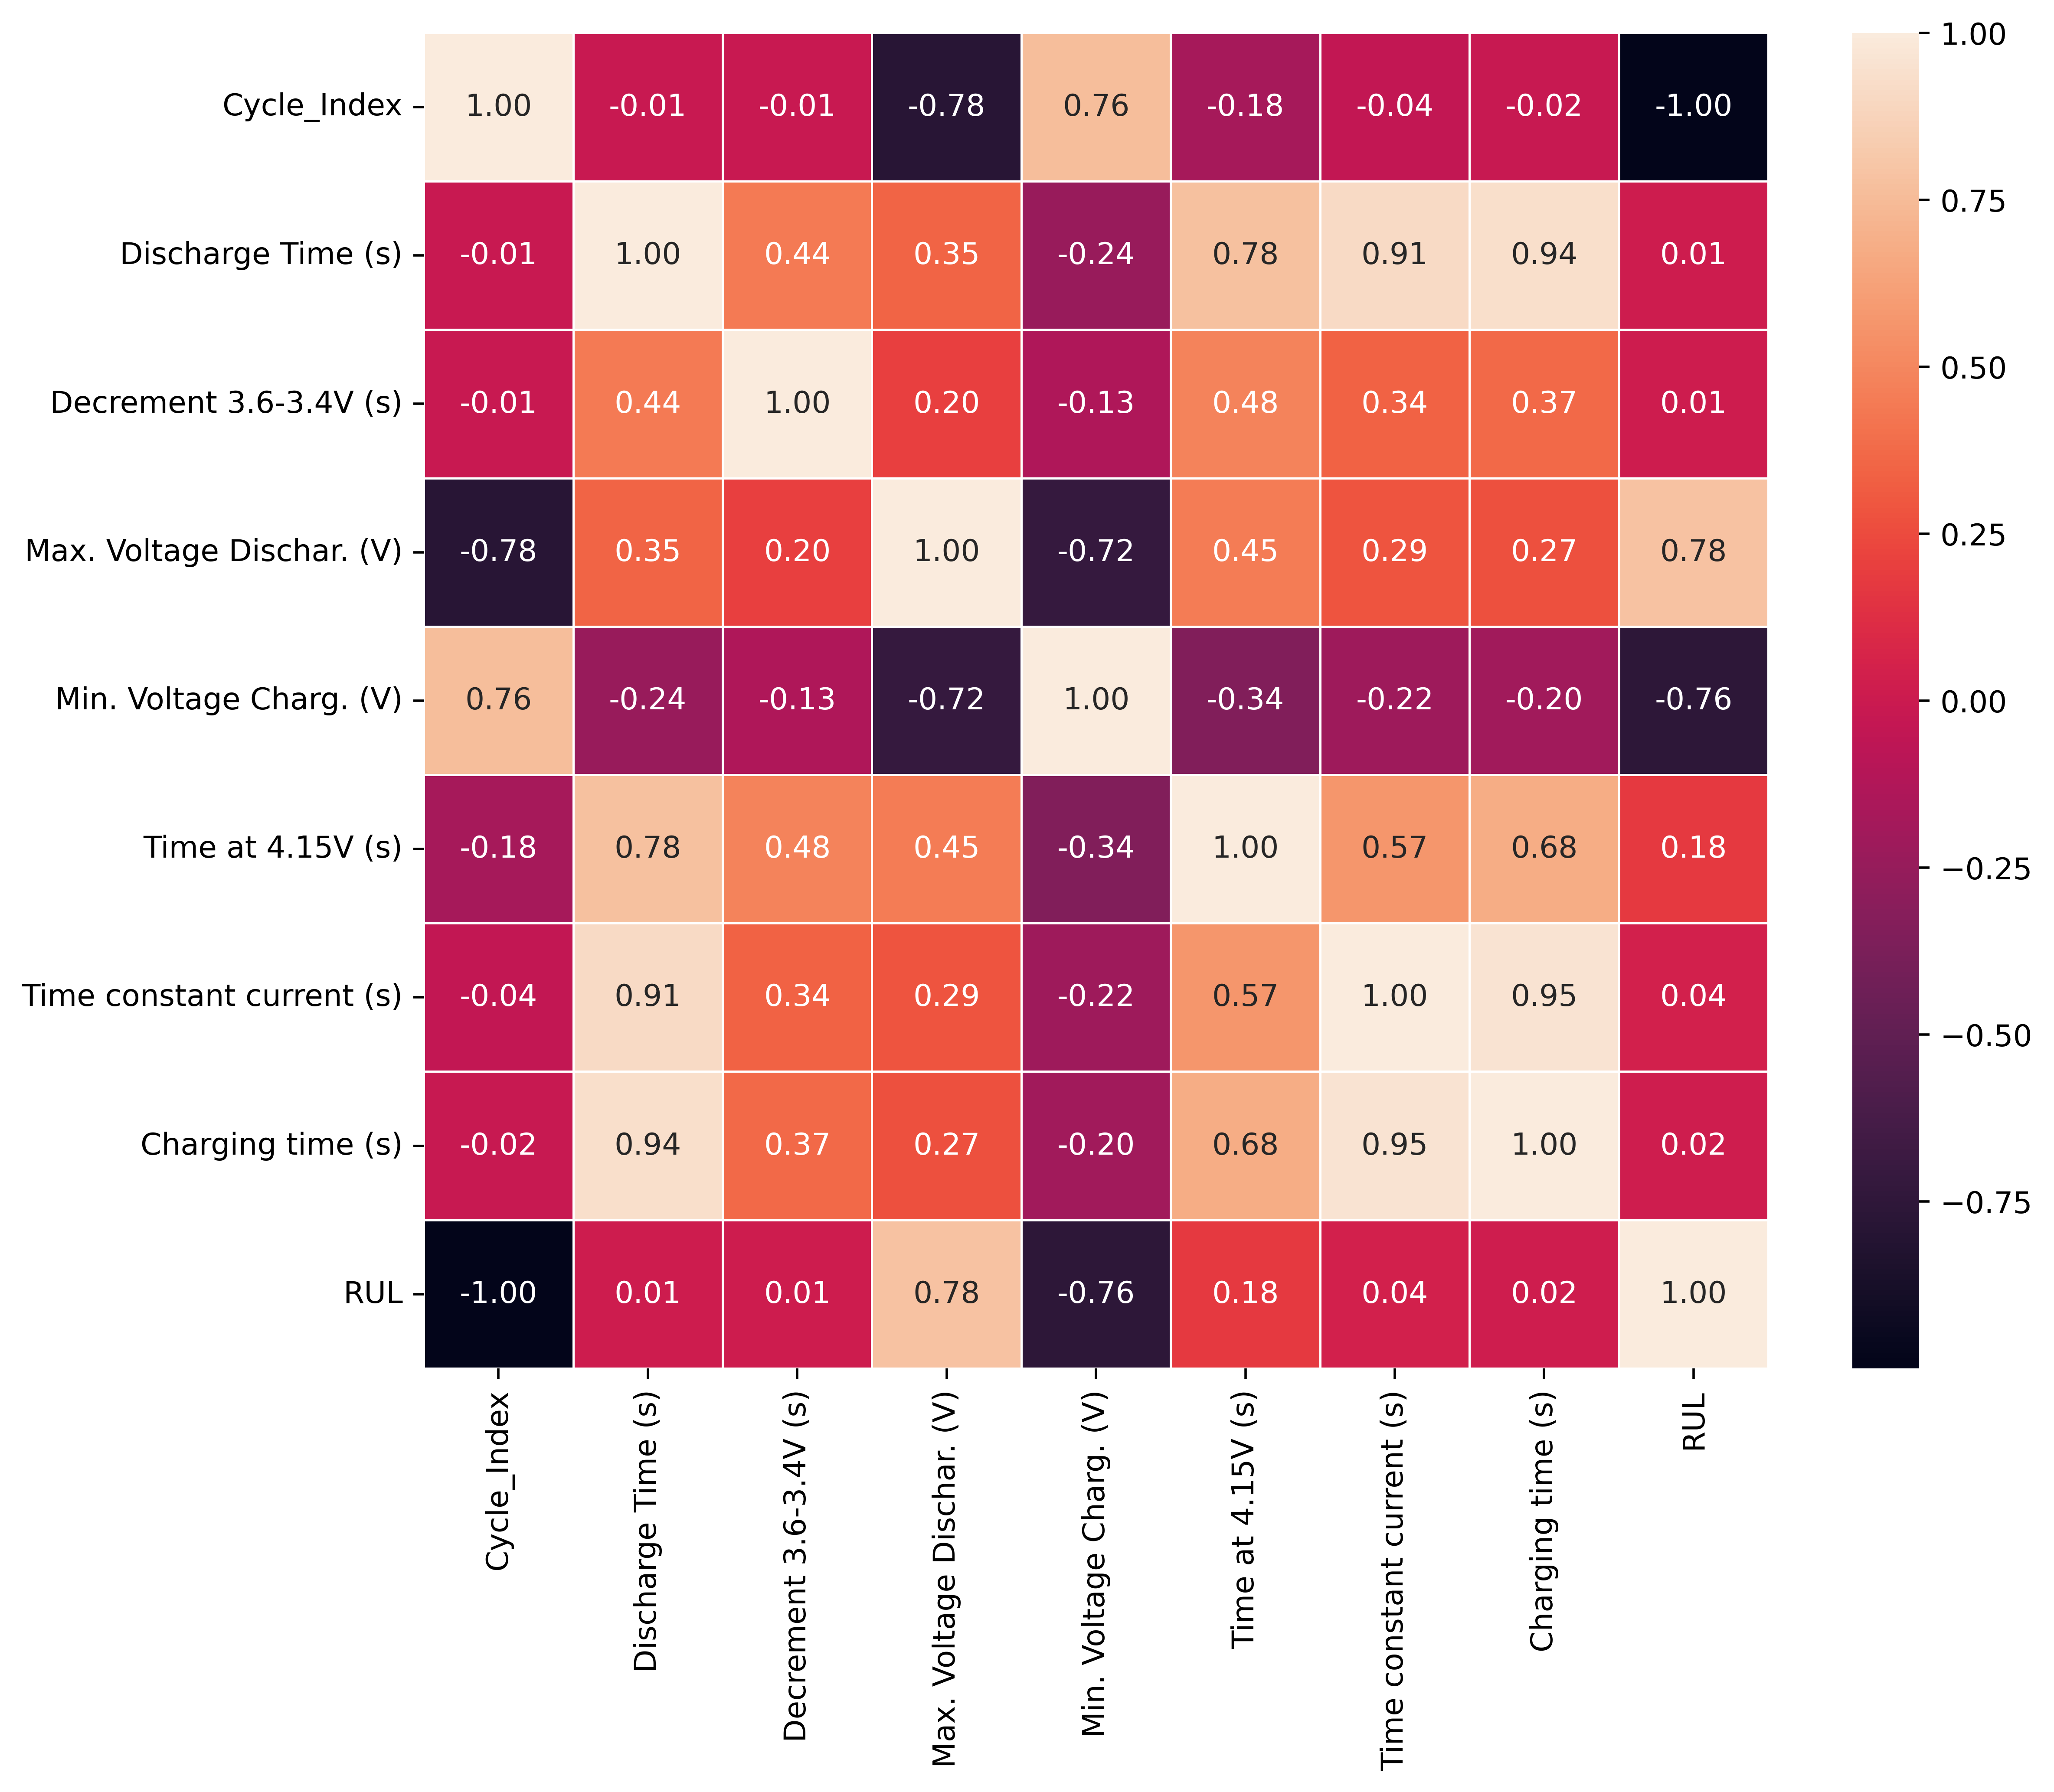

In [4]:
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

In [10]:
target = battery['RUL']
feature = battery.drop(['RUL','Cycle_Index','Decrement 3.6-3.4V (s)',
                       'Time at 4.15V (s)','Time constant current (s)','Charging time (s)'],axis=1)

In [11]:
feature.describe()

,Discharge Time (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V)
count,15064.000000,15064.000000,15064.000000
mean,4581.273960,3.908176,3.577904
std,33144.012077,0.091003,0.123695
min,8.690000,3.043000,3.022000
25%,1169.310000,3.846000,3.488000
50%,1557.250000,3.906000,3.574000
75%,1908.000000,3.972000,3.663000
max,958320.370000,4.363000,4.379000


In [12]:
# standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_std = scaler.fit_transform(feature)

feature_std = pd.DataFrame(feature_std, columns = feature.columns)
feature_std.head()

,Discharge Time (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V)
0,-0.059922,-2.617313,-2.966302
1,0.085308,3.712333,-2.893540
2,0.084859,3.745300,-2.861201
3,0.084610,3.756289,-2.853117
4,1.823662,4.195847,-1.454466


In [13]:
# split into train and test data
from sklearn.model_selection import (train_test_split, StratifiedKFold)
X_train, X_test, y_train, y_test = train_test_split(feature_std, target, test_size=0.2, random_state=2404)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12051, 3), (3013, 3), (12051,), (3013,))

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='mean'))])

def prepare_model(algorithm, X_train, y_train): 
    model = Pipeline(steps=[('preprocessing', pipeline),('algorithm', algorithm)])
    model.fit(X_train, y_train)
    return model

In [15]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error

algorithms = [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), 
              BaggingRegressor(), SVR(), DecisionTreeRegressor(), ExtraTreeRegressor(), 
              LinearRegression(), SGDRegressor(), KNeighborsRegressor()]

In [16]:
names = []
times = []
mse = []
rmse = []

for algorithm in algorithms:
    name = type(algorithm).__name__
    names.append(name)
    start_time = time.time()
    model = prepare_model(algorithm, X_train, y_train)
    pred = model.predict(X_test)
    end_time = time.time()
    times.append(end_time - start_time)
    mse.append(mean_squared_error(y_test, pred))
    rmse.append(np.sqrt(mean_squared_error(y_test, pred)))

print('Regression Results in Algorithms') 
results_dict = {'Algorithm': names, 'MSE': mse, 'RMSE': rmse, 'Time': times}
pd.DataFrame(results_dict).sort_values(by='RMSE', ascending=1)

Regression Results in Algorithms


,Algorithm,MSE,RMSE,Time
0,RandomForestRegressor,856.406459,29.264423,1.760443
3,BaggingRegressor,868.666896,29.473156,0.177728
5,DecisionTreeRegressor,1361.393337,36.897064,0.029150
6,ExtraTreeRegressor,1391.443398,37.302056,0.012893
9,KNeighborsRegressor,1664.079323,40.793128,0.016330
2,GradientBoostingRegressor,2143.619582,46.299240,0.575709
1,AdaBoostRegressor,4763.338240,69.016942,0.303367
4,SVR,9316.862696,96.523897,12.027660
7,LinearRegression,22108.110090,148.687962,0.009661
8,SGDRegressor,22531.416813,150.104686,0.014401
